In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the data
file_path = 'enhanced_spx_data.csv'
spx_data = pd.read_csv(file_path)

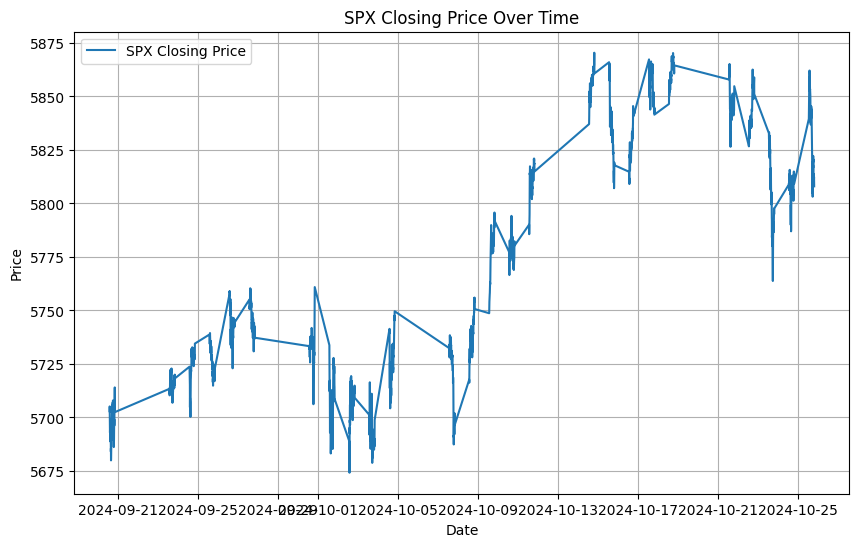

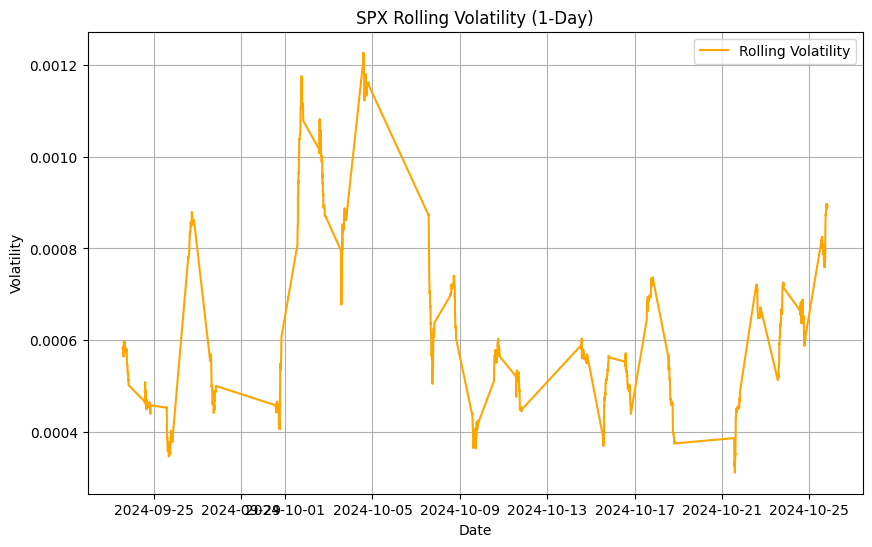


Enhanced data with returns and volatility saved to enhanced_spx_data.csv


In [31]:


# Convert timestamp column to datetime (if not already converted)
spx_data['Datetime'] = pd.to_datetime(spx_data['Datetime'])

# Calculate returns
spx_data['returns'] = spx_data['Adj Close'].pct_change()

# Calculate rolling volatility (e.g., 1-day rolling std)
spx_data['volatility'] = spx_data['returns'].rolling(window=78).std()  # 78 for 1 day (assuming 5-min intervals)


spx_data = spx_data.sort_values(by='Datetime')
# Plot the closing price
plt.figure(figsize=(10, 6))
plt.plot(spx_data['Datetime'], spx_data['Adj Close'], label='SPX Closing Price')
plt.title('SPX Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Plot the rolling volatility
plt.figure(figsize=(10, 6))
plt.plot(spx_data['Datetime'], spx_data['volatility'], label='Rolling Volatility', color='orange')
plt.title('SPX Rolling Volatility (1-Day)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid()
plt.show()

# Step 8: Save the enhanced dataset with calculated metrics
enhanced_file_path = 'enhanced_spx_data.csv'
spx_data.to_csv(enhanced_file_path, index=False)
print(f"\nEnhanced data with returns and volatility saved to {enhanced_file_path}")


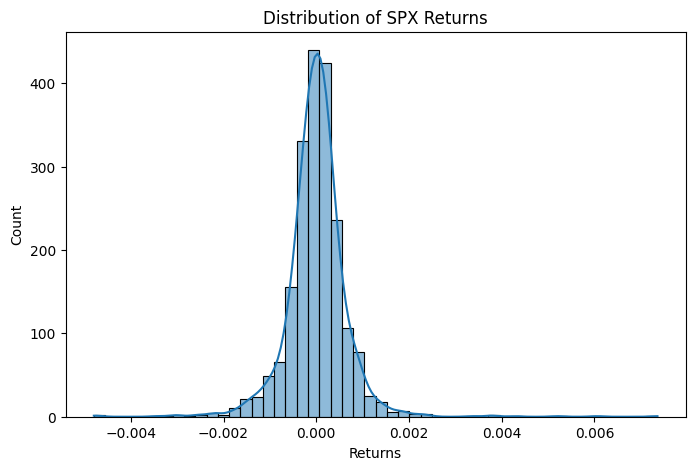

In [32]:
# Plot histogram of returns
plt.figure(figsize=(8, 5))
sns.histplot(spx_data['returns'].dropna(), bins=50, kde=True)
plt.xlabel('Returns')
plt.title('Distribution of SPX Returns')
plt.show()


In [33]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test on returns
adf_test = adfuller(spx_data['returns'].dropna())

print("Dickey-Fuller Test:")
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

if adf_test[1] < 0.05:
    print("The data is stationary (reject null hypothesis).")
else:
    print("The data is not stationary (fail to reject null hypothesis).")


Dickey-Fuller Test:
ADF Statistic: -46.162821810217984
p-value: 0.0
The data is stationary (reject null hypothesis).


In [34]:
# Load the data
spx_data = pd.read_csv('enhanced_spx_data.csv')

# Extract the last known SPX price
last_price = spx_data['Adj Close'].iloc[-1]
print(f"Last known SPX price: {last_price}")

# Calculate mean and standard deviation of returns
mu = spx_data['returns'].mean()
sigma = spx_data['returns'].std()

print(f"Mean (mu) of returns: {mu}")
print(f"Standard deviation (sigma) of returns: {sigma}")


Last known SPX price: 5808.0
Mean (mu) of returns: 9.232023958183985e-06
Standard deviation (sigma) of returns: 0.0006679371217112106


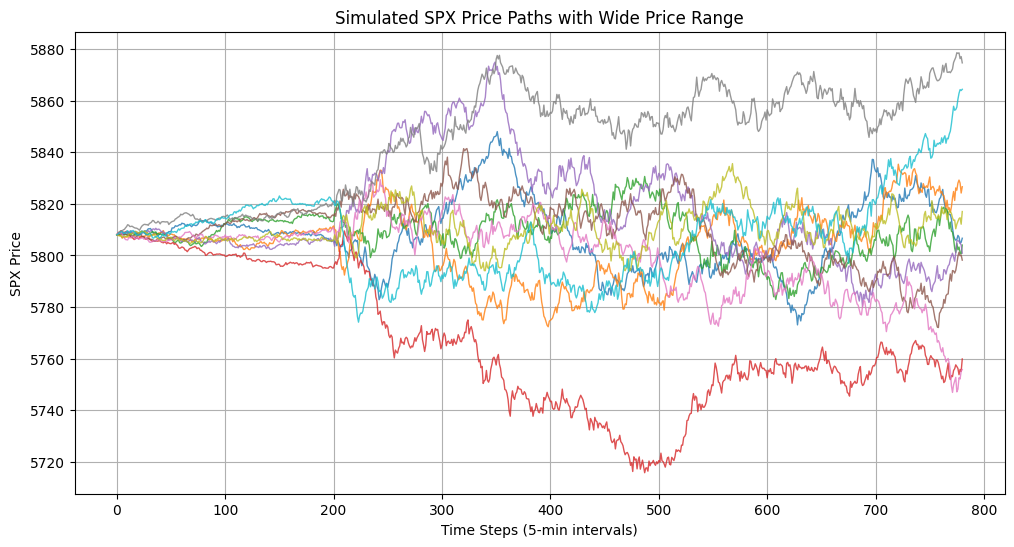

In [35]:
# Simulation parameters
num_simulations = 8000  # Increased number of simulated price paths
num_steps = 10 * 78      # 10 trading days with 5-minute intervals
dt = 1 / 78              # Time step size (1/78 trading days for 5-min intervals)

# Array to store simulated price paths
simulated_paths = np.zeros((num_steps + 1, num_simulations))

# Initialize the starting price for all simulations
simulated_paths[0] = last_price

# Generate price paths using GBM
np.random.seed(42)  # For reproducibility
for t in range(1, num_steps + 1):
    # Random shocks for this step
    random_shocks = np.random.standard_normal(num_simulations)
    
    # Introduce broader price movement after 200 steps
    if t > 200:
        # Increase variability by scaling sigma for larger movements
        adjusted_sigma = sigma * 5  # Doubled standard deviation for more extreme movements
        simulated_paths[t] = simulated_paths[t - 1] * np.exp(
            (mu - 0.5 * adjusted_sigma**2) * dt + adjusted_sigma * np.sqrt(dt) * random_shocks
        )
    else:
        # Regular GBM formula for the initial  steps
        simulated_paths[t] = simulated_paths[t - 1] * np.exp(
            (mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * random_shocks
        )

# Convert to DataFrame for easier handling
simulated_df = pd.DataFrame(simulated_paths)

# Plot the first 10 simulated paths
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.plot(simulated_df[i], lw=1, alpha=0.8)

plt.xlabel('Time Steps (5-min intervals)')
plt.ylabel('SPX Price')
plt.title('Simulated SPX Price Paths with Wide Price Range')
plt.grid()
plt.show()




In [36]:
# Save to CSV
simulated_paths_df = pd.DataFrame(simulated_paths)
simulated_paths_df.insert(0, "Time_Step", range(simulated_paths.shape[0]))
simulated_paths_df.to_csv("simulated_price_paths.csv", index=False)

print("Simulated price paths saved to 'simulated_price_paths.csv'.")

Simulated price paths saved to 'simulated_price_paths.csv'.
